# Logistic Regression and Regularization

This notebook is a workthrough of the second assignment for the Stanford machine learning class taught by Andrew Ng. I chose to do the assignments in python for the extra challenge of not having any of the code written for me and because python is used more often in industry in matlab.

I model the logistic regression using a built-in optimizor and scikit-learn logistic regression solver. Check out the linear regression for my implementation of gradient descent.


This notebook doesn't analyze the results of the regression, instead it just shows how to use logostic regression to classify data.

$\\$

Import useful packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import special, optimize
%matplotlib inline

from __future__ import division


from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

import seaborn as sns
sns.set_context('poster')
sns.set_color_codes()

C:\Users\TJ\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


$\\$ 

Import the data!

In [2]:
admitted_data = pd.read_csv('ex2data1.txt', names = ['Exam1', 'Exam2', 'Admitted'])
admitted_data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


$\\$

Define $X$ as the matrix of values of explanatory variables matrix, and $y$ as the observed responses. 

In [3]:
X = admitted_data.ix[:,:2]
y = admitted_data.Admitted

$\\$

Since there are only two explantory variables, we can plot the data. 

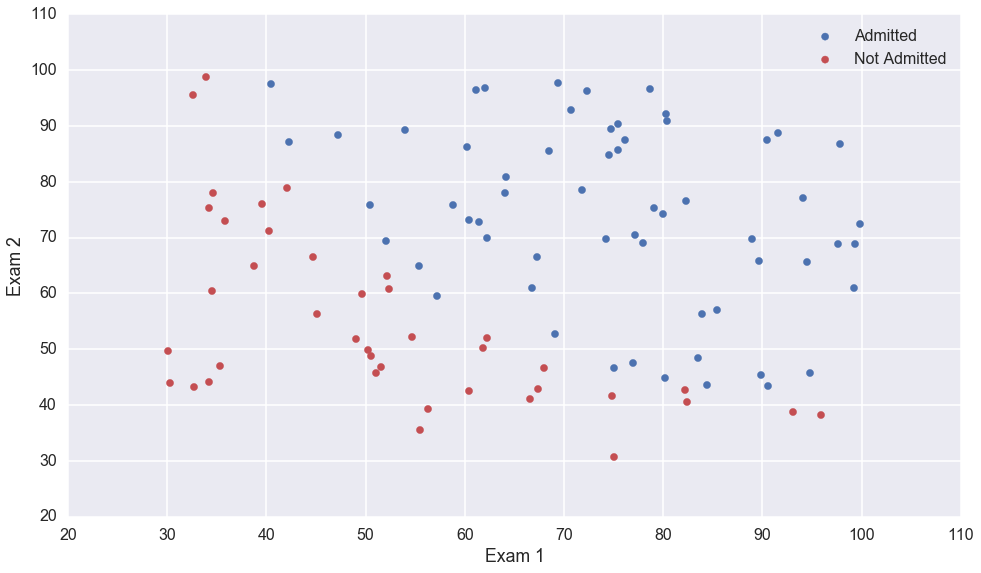

In [4]:
fig, ax = plt.subplots(figsize = (16,9))

admit = admitted_data[admitted_data.Admitted == 1]
not_admit = admitted_data[admitted_data.Admitted == 0]

ax.scatter(admit.Exam1, admit.Exam2, s = 50,color = 'b', label = "Admitted")
ax.scatter(not_admit.Exam1, not_admit.Exam2, s = 50,color = 'r', label = "Not Admitted")
ax.legend()
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")

$\\$

Looking at the data, we see that a linear logostic regression would be a good first model.

Define the logostic cost function, since we are just fitting a linear fit, there is no need for regularization.

In [12]:
sigmoid = special.expit
def cost(coeff, _X, _y, regularization = 0):
    if 'CONSTANT_TERM' not in _X.columns:
        _X.insert(0,"CONSTANT_TERM",np.ones(len(_X)))
    
    reg_cost = regularization * sum(coeff**2) 
    fit_cost = (-1/len(_y)) * (np.log(sigmoid(_X.dot(coeff))).T.dot(_y) + np.log(1- sigmoid(_X.dot(coeff))).T.dot(1-_y))
    return reg_cost + fit_cost


$\\$

Use the built in scipy optimizatioin method (downhill simplex) to descend the cost function to optimize. 

In [10]:
_X = X.copy() # so we can pass by value
coeff = optimize.fmin(cost, [0,0,0], args=(_X,y))
print coeff

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
[-25.16130062   0.20623142   0.20147143]


$\\$

We can also use scikit learn to fit the regression. Scikit learn automatically includes an inverse regularization parameter, $C$, so we make it very large so we can compare the fit given by scikit learn and our own cost function. As you can see they both give the same coefficients!

In [13]:
model = LogisticRegression(C = 10e9)
model.fit(admitted_data.ix[:,:2],admitted_data.Admitted)
print model.intercept_ ,model.coef_

[-24.9560464] [[ 0.20459008  0.19981009]]


$\\$

We can now plot our decision boundary. The boundary is 

$$g(\theta^TX) = \frac{1}{2}$$

where $g$ is the sigmoid function. To plot this we can define a mesh for $X_1$ and $X_2$ and plot the contour for $\frac{1}{2}$

In [14]:
# Define Mesh
xx, yy = np.mgrid[30:100:.05, 30:100:.05]

# Predict probability for each point in the mesh
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

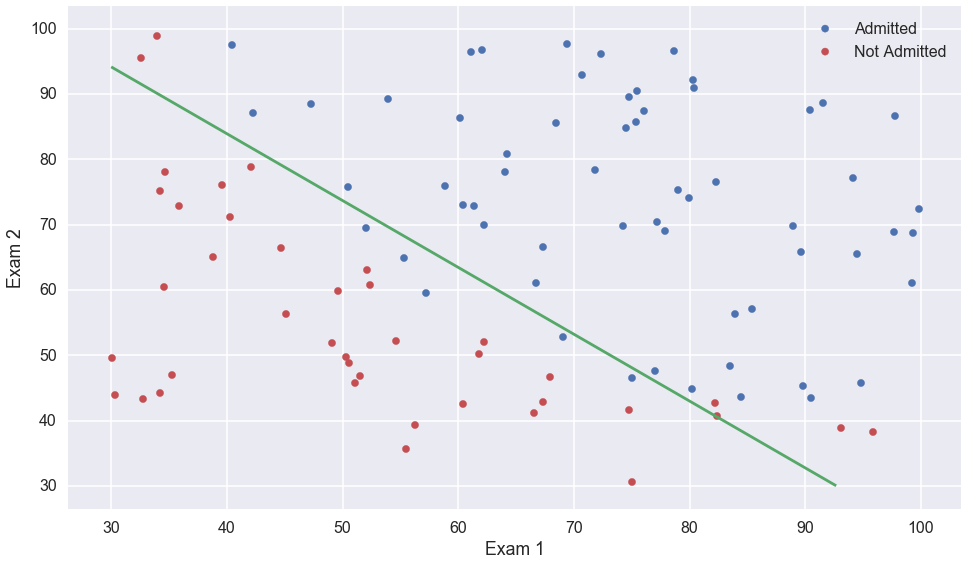

In [16]:
fig, ax = plt.subplots(figsize = (16,9))

admit = admitted_data[admitted_data.Admitted == 1]
not_admit = admitted_data[admitted_data.Admitted == 0]

ax.scatter(admit.Exam1, admit.Exam2, s = 50,color = 'b', label = "Admitted")
ax.scatter(not_admit.Exam1, not_admit.Exam2, s = 50,color = 'r', label = "Not Admitted")

ax.contour(xx,yy,Z, levels = [.5], colors = 'g')

ax.legend()
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")

$\\$

Looking at the plot, we see that we could do better with a second degree polynomail decision boundary. Scikit learn makes this easy.

In [111]:
polyFeat = preprocessing.PolynomialFeatures(degree =2)

# This fit_transform returns a matrix with the 2nd degree poly terms
Xdeg2 = polyFeat.fit_transform(X)

# We can fit the 2nd degree polynomial now
model.fit(Xdeg2, y)

LogisticRegression(C=100000000000L, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

$\\$

Plot the new polynomial fit. It fits perfectly!

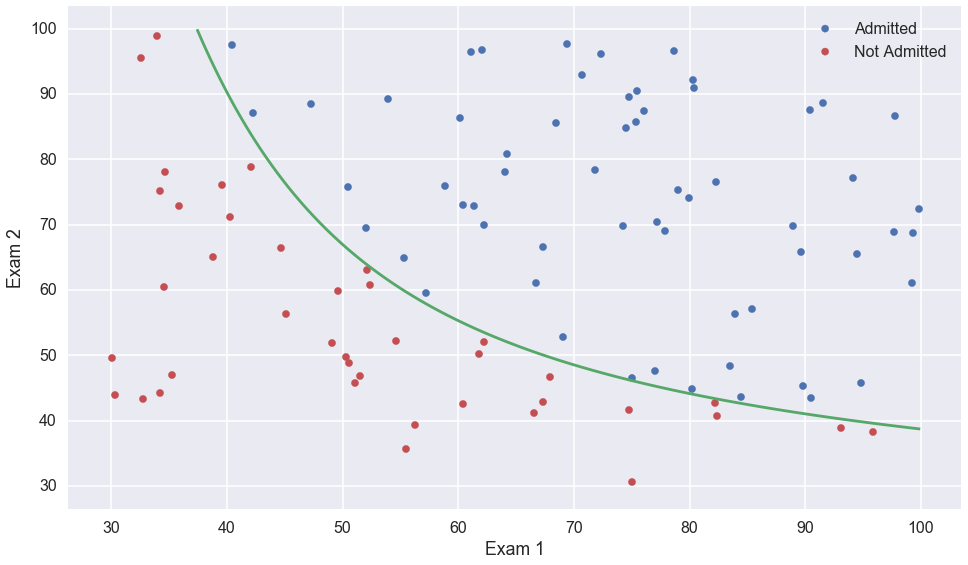

In [131]:
xx, yy = np.mgrid[30:100:.05, 30:100:.05]
Z = model.predict_proba(polyFeat.fit_transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1].reshape(xx.shape)

fig, ax = plt.subplots(figsize = (16,9))

admit = admitted_data[admitted_data.Admitted == 1]
not_admit = admitted_data[admitted_data.Admitted == 0]

ax.scatter(admit.Exam1, admit.Exam2, s = 50,color = 'b', label = "Admitted")
ax.scatter(not_admit.Exam1, not_admit.Exam2, s = 50,color = 'r', label = "Not Admitted")

ax.contour(xx,yy,Z, levels = [.5], colors = 'g')

ax.legend()
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")

$\\$

Read in and plot the second data set

In [19]:
data2 = pd.read_csv('ex2data2.txt', names=['Test1','Test2','Success'])

data2.head()


,Test1,Test2,Success
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


$\\$

Plot the data. Notice the very nonlinear behavior. In these situations a different clustering algorithm might be best, but since there are only two explanitory variables, a polynomial logistic regression will work fine

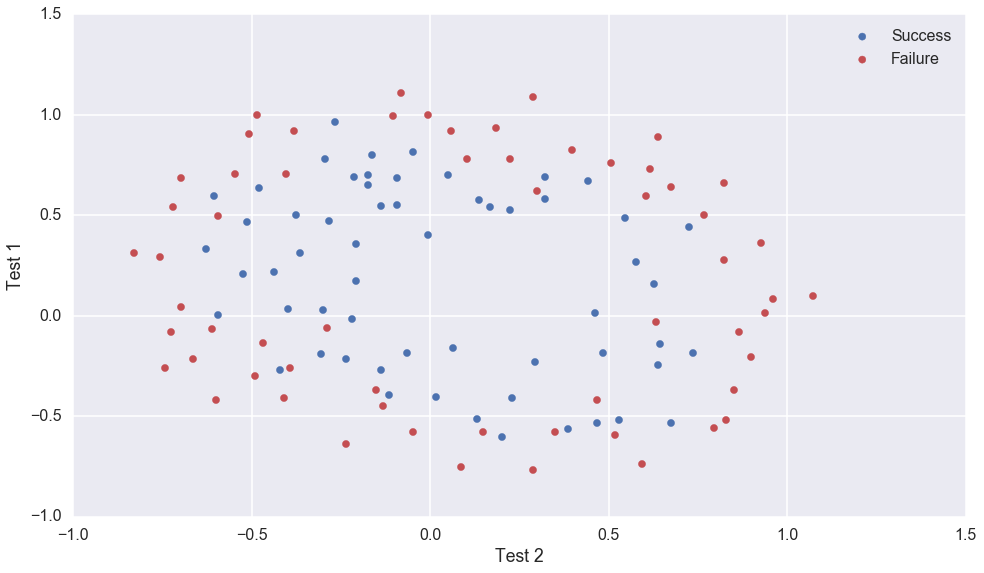

In [18]:
successes = data2[data2.Success == 1]
fail = data2[data2.Success == 0]

fig, ax = plt.subplots(figsize = (16,9))

ax.scatter(successes.Test1, successes.Test2, color = 'b', s = 50, label = 'Success')
ax.scatter(fail.Test1, fail.Test2, color = 'r', s = 50, label = 'Failure')
ax.set_ylabel('Test 1')
ax.set_xlabel('Test 2')
ax.legend()

$\\$

Using no regularization and a 6th degree polynomial transform of the explanitory matrix, fit the data

In [20]:
# Transform data to include all 6th degree polynomial terms
polyFeat = preprocessing.PolynomialFeatures(degree= 6)

# Fit the data
model.fit(polyFeat.fit_transform(data2.ix[:,:2]),data2.Success)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

$\\$

Plot the fit. Notice with no regularization the data is way overfitted. While the model fits the current data well, it will clearly not predict well.

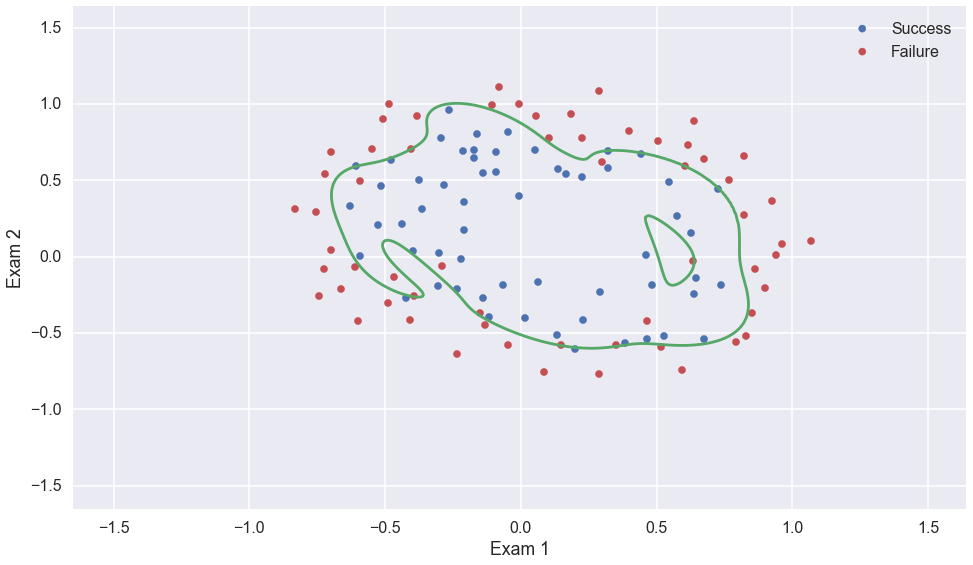

In [139]:
xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
Z = model.predict_proba(polyFeat.fit_transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1].reshape(xx.shape)

fig, ax = plt.subplots(figsize = (16,9))

admit = admitted_data[admitted_data.Admitted == 1]
not_admit = admitted_data[admitted_data.Admitted == 0]

ax.scatter(successes.Test1, successes.Test2, color = 'b', s = 50, label = 'Success')
ax.scatter(fail.Test1, fail.Test2, color = 'r', s = 50, label = 'Failure')

ax.contour(xx,yy,Z, levels = [.5], colors = 'g')

ax.legend()
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")

$\\$

Increasing the regularization, still a little overfitted

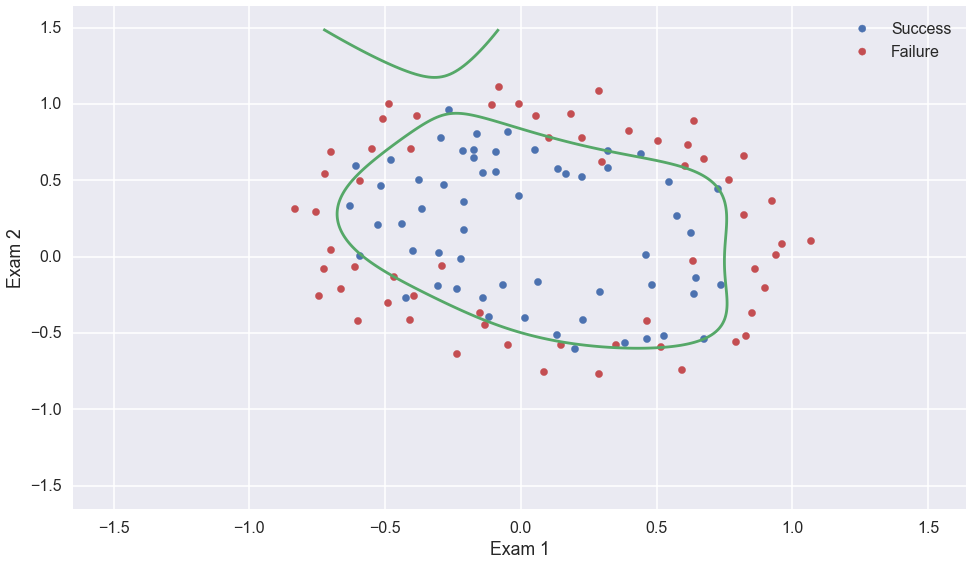

In [142]:
model2 = LogisticRegression(C = 1000)
model2.fit(polyFeat.fit_transform(data2.ix[:,:2]),data2.Success)

xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
Z= model2.predict_proba(polyFeat.fit_transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1].reshape(xx.shape)

fig, ax = plt.subplots(figsize = (16,9))

admit = admitted_data[admitted_data.Admitted == 1]
not_admit = admitted_data[admitted_data.Admitted == 0]

ax.scatter(successes.Test1, successes.Test2, color = 'b', s = 50, label = 'Success')
ax.scatter(fail.Test1, fail.Test2, color = 'r', s = 50, label = 'Failure')

ax.contour(xx,yy,Z, levels = [.5], colors = 'g')

ax.legend()
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")

$\\$

More regularization, a good fit! 

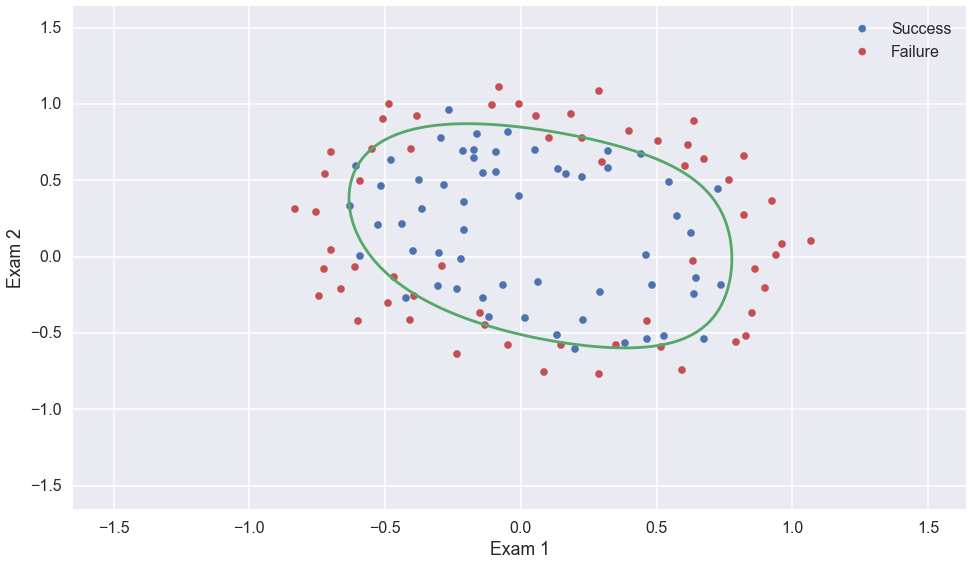

In [143]:
model2 = LogisticRegression(C = 10)
model2.fit(polyFeat.fit_transform(data2.ix[:,:2]),data2.Success)

xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
Z = model2.predict_proba(polyFeat.fit_transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1].reshape(xx.shape)

fig, ax = plt.subplots(figsize = (16,9))

admit = admitted_data[admitted_data.Admitted == 1]
not_admit = admitted_data[admitted_data.Admitted == 0]

ax.scatter(successes.Test1, successes.Test2, color = 'b', s = 50, label = 'Success')
ax.scatter(fail.Test1, fail.Test2, color = 'r', s = 50, label = 'Failure')

ax.contour(xx,yy,Z, levels = [.5], colors = 'g')

ax.legend()
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")

Too much regularization!

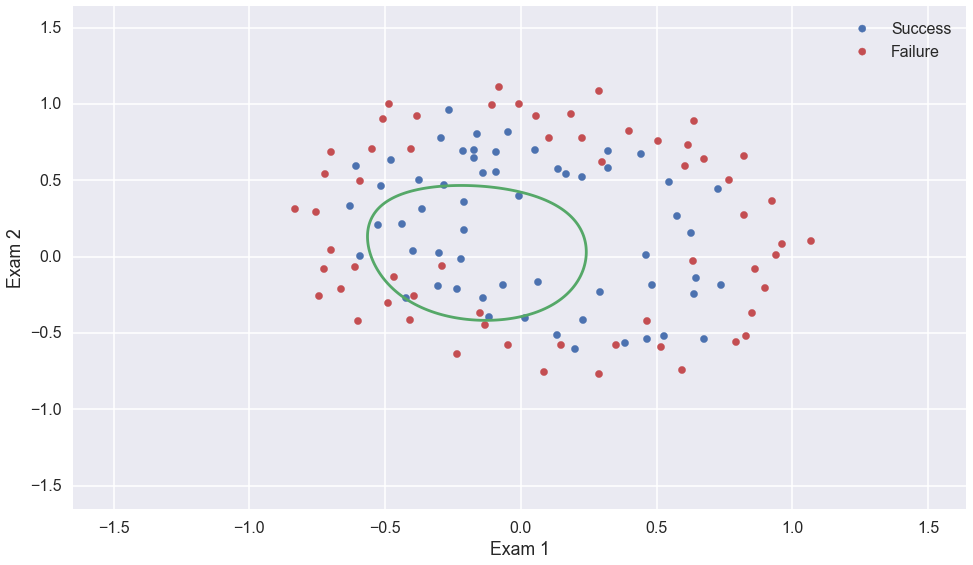

In [146]:
model2 = LogisticRegression(C = .01)
model2.fit(polyFeat.fit_transform(data2.ix[:,:2]),data2.Success)

xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
Z = model2.predict_proba(polyFeat.fit_transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1].reshape(xx.shape)

fig, ax = plt.subplots(figsize = (16,9))

admit = admitted_data[admitted_data.Admitted == 1]
not_admit = admitted_data[admitted_data.Admitted == 0]

ax.scatter(successes.Test1, successes.Test2, color = 'b', s = 50, label = 'Success')
ax.scatter(fail.Test1, fail.Test2, color = 'r', s = 50, label = 'Failure')

ax.contour(xx,yy,Z, levels = [.5], colors = 'g')

ax.legend()
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")

A more rigorous way to select the best regularization constant is to optimize over trails of subsampled data.  